# Chaos - Großes Projekt

Teammitglieder: Tobias Peslalz, Manuel Hertle, Christian Ringmayr

Arbeitsverteilung:
logistische Gleichung + Feigenbaumdiagramm: Manuel Hertle
Sensitivität + Selbstähnlichkeit: Christian Ringmayr
Mandelbrotmenge + Juliamenge: Tobias Peslalz

#### Aufgabenstellung:

Beschäftigen Sie sich mit den Themen
- logistische Gleichung (Herleitung, Iteration (SageMath -Notebook, möglichst
interaktiv))
-  Feigenbaum-Diagramm
- Sensitivität
- Julia-Mengen
- Mandelbrotmenge
- Apfelmännchen und Selbstähnlichkeit

und illustrieren Sie möglichst viele Themen durch eigene Implementationen in
Sagemath.

# Sensitivität der Anfangsbedinungen

In [19]:
import numpy as numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Definition Sensitivität:
Unter Sensitivität versteht man die Stärke der Veränderung, bei meist nicht messbaren Abweichungen der Anfangsbedingungen und mehrfacher Ausführung im Laufe der Zeit.
Umso stärker die Veränderung ausfällt, umso höher ist die Sensitivität.
#### Beispiel: Werfen eines Würfels
Das Werfen eines Würfels folgt festen pyhsikalischen Regeln. In der Theorie muss beim genau gleichen Würfeln die selbe Augenzahl erscheinen, wie beim ersten Mal. Die Schlussfolgerung daraus wäre, dass es deterministisch, also vorhersebar ist.

Die Realität zeigt aber ein deutlich anderes Verhalten.
Das Ergebnis scheint willkürlich zu sein und wird durch viele anderen Faktoren beeinflusst. 
Zum Beispiel durch eine Einkerbung auf dem Tisch oder einen Windzug.
Daher ist eine Vorhersage chaotisch bzw. zufällig.
Definition deterministisch: Ergebnis lässt sich aus dem Vorherigen berechnen.
Quelle: http://www.fraktalwelt.de/systeme/detchaos.pdf
#### Weiteres bekanntes Beispiel: Schmetterlingseffekt (kleine Ursache - große Wirkung)
Annahme: Der Flügelschlag eines Schmetterlings am Amazonas kann durch den entstandenen Luftwirbel im Laufe der Zeit einen Wirbelsturm in Florida auslösen.

Der Schmetterlingseffekt wird oft mit der Sensitivität der Anfangsbedingungen in Verbindung gebracht.
#### Erklärungen Kausalität:
Schwaches Kausalitätsprinzip: Gleiche Ursache führt zur gleichen Wirkung.
Da es in der Realität allerdings nicht so ist, greift man auf das starke Kausalitätsprinzip zurück, welches besagt ähnliche Ursachen haben gleiche Wirkung. Es folgen zwei Beispiele bei denen die Kausalität nicht gilt.

Quelle: https://www.leifiphysik.de/waermelehre/deterministisches-chaos/grundwissen/starke-und-schwache-kausalitaet

### 1. Beispiel: "Beliebige Gleichung"

In [20]:
#Diese Funktion ist nur zum Testen der Sensitivität gedacht und dient keinem weiterem Zweck.
#Sie erhält genau einen Wert und führt die Rechnung 1 Millionen mal aus und weist sich jedes mal selber
#erneut den Wert zu.
#Zum Schluss wird der Wert mal 100 genommen um eine Kommazahl zwische 0 und 1 zu einer Zahl zwischen 0 und
#100 zu machen. Außerdem wird das Ergebnis zum Schluss gerundet.
def calculateValue(value):
    for i in range(1000000):
        value = 4*value*(1-value)
    value = value*100
    print(value.round())

#### Drei nah aneinanderliegende verschiedene Anfangswerte:

In [21]:
firstValue = 0.12345
secondValue = 0.123456789012345 
thirdValue = 0.123456789012344

#### Verschiedene Werte von oben einsetzen:

In [22]:
calculateValue(firstValue)

91


In [23]:
calculateValue(secondValue)

50


In [24]:
calculateValue(thirdValue)

34


## 2. Beispiel: Lorenz-Attraktor

In [25]:
from IPython.display import Image
from IPython.core.display import HTML

### Entstehung Konvektionsrollen:
Anfangs befindet sich eine Flüssigkeit zwischen zwei Metallplatten. Die obere Metallplatte ist kälter als die untere. Mit der Erwärmung der unteren Platte und einem höheren Temperaturunterschied steigt die Flüssigkeit nach oben, kühlt sich ab und sinkt wieder nach unten. Dabei entstehen sogenannte Konvektionsrollen.

$$Konvektionsrollen$$

In [26]:
Image(url="https://i.ibb.co/z52kVTM/Konvektionsrollen.jpg")

Quelle: http://www.mathematik.uni-dortmund.de/data/pdf/Helfmeier2012.pdf 

### Definition Attraktor und Trajektorie:
In einem beliebig dimensionalen Raum stellt der Zustand eines Systems einen Punkt dar. Der Zustand kann durch mehrere Parameter gegeben sein. (z.B. Windrichtung, Luftfeuchtigkeit) Verbindet man zwei Zustände miteinander nennt man das ganze Trajektorie. Wenn jetzt diese Trajektorien ausgehend von verschiedenen Startpunkten asymptotisch auf einen Bereich zustreben nennt man diesen Attraktor.
Quelle: https://emergenz.hpfsc.de/html/node15.html

## Erklärung Lorenz-System

Das System von Lorenz beschreibt Zustände in der Erdatmosphäre und stellt Konvektionsrollen in stark vereinfachter Form da. Da es nur für einen kleinen Zahlenbereich realistische Werte liefert und bereits bei kleinen Abweichungen starke Veränderungen bewirkt ist es ein gutes Beispiel für chaotischen Determinismus, sowie Sensitivität der Anfangsbedingungen.

Gekoppelte nicht lineare Differentialgleichungen des Lorenz-Systems:

Erklärung Prandtl-Zahl (a): Parameter ist ein Maß für die Trägheit eines hydrodynamischen Stoffs.

Erklärung Rayleigh-Zahl (b): Parameter gibt an, ob Wärmeübertragung primär durch Wärmeleitung beziehungsweise Konvektionsrolllen stattfindet.

Erklärung Paramter c: geometrischer Faktor

Quelle: https://www.itp.tu-berlin.de/fileadmin/a3233/upload/WS10_11/Mechanik/Dynamische_Systeme_und_deterministisches_Chaos.pdf

$$Gleichungssystem:$$

$$x_{next} = a * (y-x)$$
$$y_{next} = x * (b-z)-y$$
$$z_{next} = x*y - c*z$$

Typische Parametereinstellung mit chaotischer Lösung:
    a = 10 (Prandtl-Zahl); b = 28 (Rayleigh-Zahl); c = 8/3 

#### Fazit:
Wie deutlich zu erkennen ist unterscheiden sich die Endwerte deutlich voneinander, obwohl nur eine minimale Abweichung der Anfangswerte vorliegt.

In [27]:
#Die Anzahl der Schritte
numberSteps = 10000;
#Als nächstes muss für x, y und z ein leeres Array (gefüllt mit Nullen) erzeugt werden
x = numpy.zeros(numberSteps + 1)
y = numpy.zeros(numberSteps + 1)
z = numpy.zeros(numberSteps + 1)

# Die Berechnung der nächsten Koordinaten im Raum beruht auf der aktuellen Position, der Änderung, gegeben durch 
# Differentialgleichungen und der Weite eines Schritts.
# Die Methode bekommt die Anzahl der Iterationen, die Weite eines Schritts,
# die Werte von a, b und c, sowie die Koordinaten (x,y,z) des Anfangspunktes übergeben.
def calculatePoints(numberSteps, widthStep, a, b, c, startX, startY, startZ):
    # Starwerte festlegen --> übergebenen Anfangspunkt in Array auf erste Position
    x[0], y[0], z[0] = startX, startY, startZ
    # In einer Schleife werden nun die weiteren Punkte berechnet.
    for i in range(numberSteps):
        x[i+1] = x[i] + (widthStep * (a * (y[i] - x[i])))
        y[i+1] = y[i] + (widthStep * (b * x[i] - y[i] - x[i] * z[i]))
        z[i+1] = z[i] + (widthStep * (x[i]*y[i] - c*z[i]))

In [28]:
#Die Funktion zeichnet die Funktion, welche durch die drei, als Paramter, übergebenen Punkte-Arrays
#definiert ist.
def drawPicture(x,y,z):
    # Figur erzeugen
    figure = plt.figure(figsize=(30,20))
    # Die 3D Funktion muss aktiviert werden
    graph = figure.gca(projection='3d')
    # Danach noch das Diagramm nach belieben beschriften
    graph.plot(x, y, z, lw=2.0)
    graph.set_xlabel("X Achse")
    graph.set_ylabel("Y Achse")
    graph.set_zlabel("Z Achse")
    graph.set_title("Lorenz System")
    # Bild anzeigen
    return plt.show()

#### Der Plot des Lorenz-Attraktors mit den "Standard" Werten sieht wie folgt aus:

In [29]:
calculatePoints(10000,0.01, 10, 28, 8/3, 0.1, 0.1, 0.1)

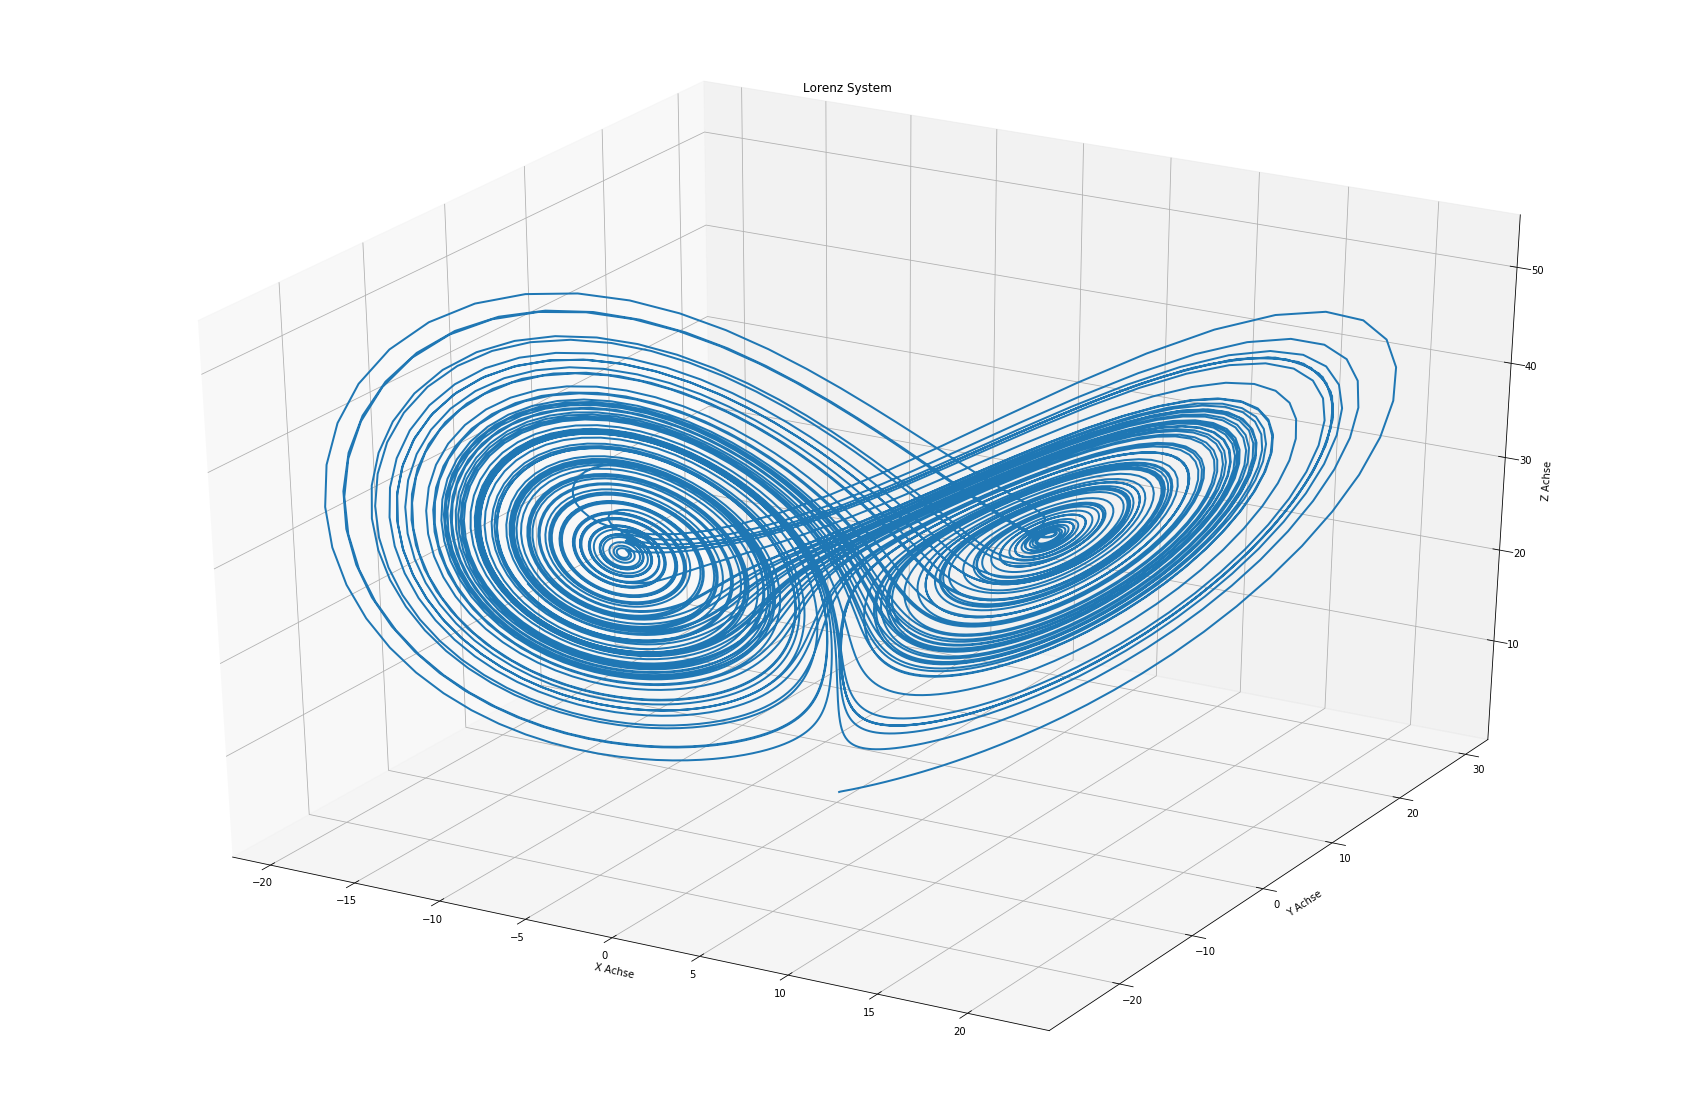

In [30]:
drawPicture(x,y,z)

### Demonstration der Sensitivität der Anfangsbedingung anhand des Lorenz Attraktors:

- Wählen von b = 6
- Anfangswerte sehr nah am Ursprung --> Annäherung an Ursprung von positiver Seite

In [31]:
calculatePoints(10000,0.01, 10, 6, 8/3, 0.01, 0.01, 0.01)

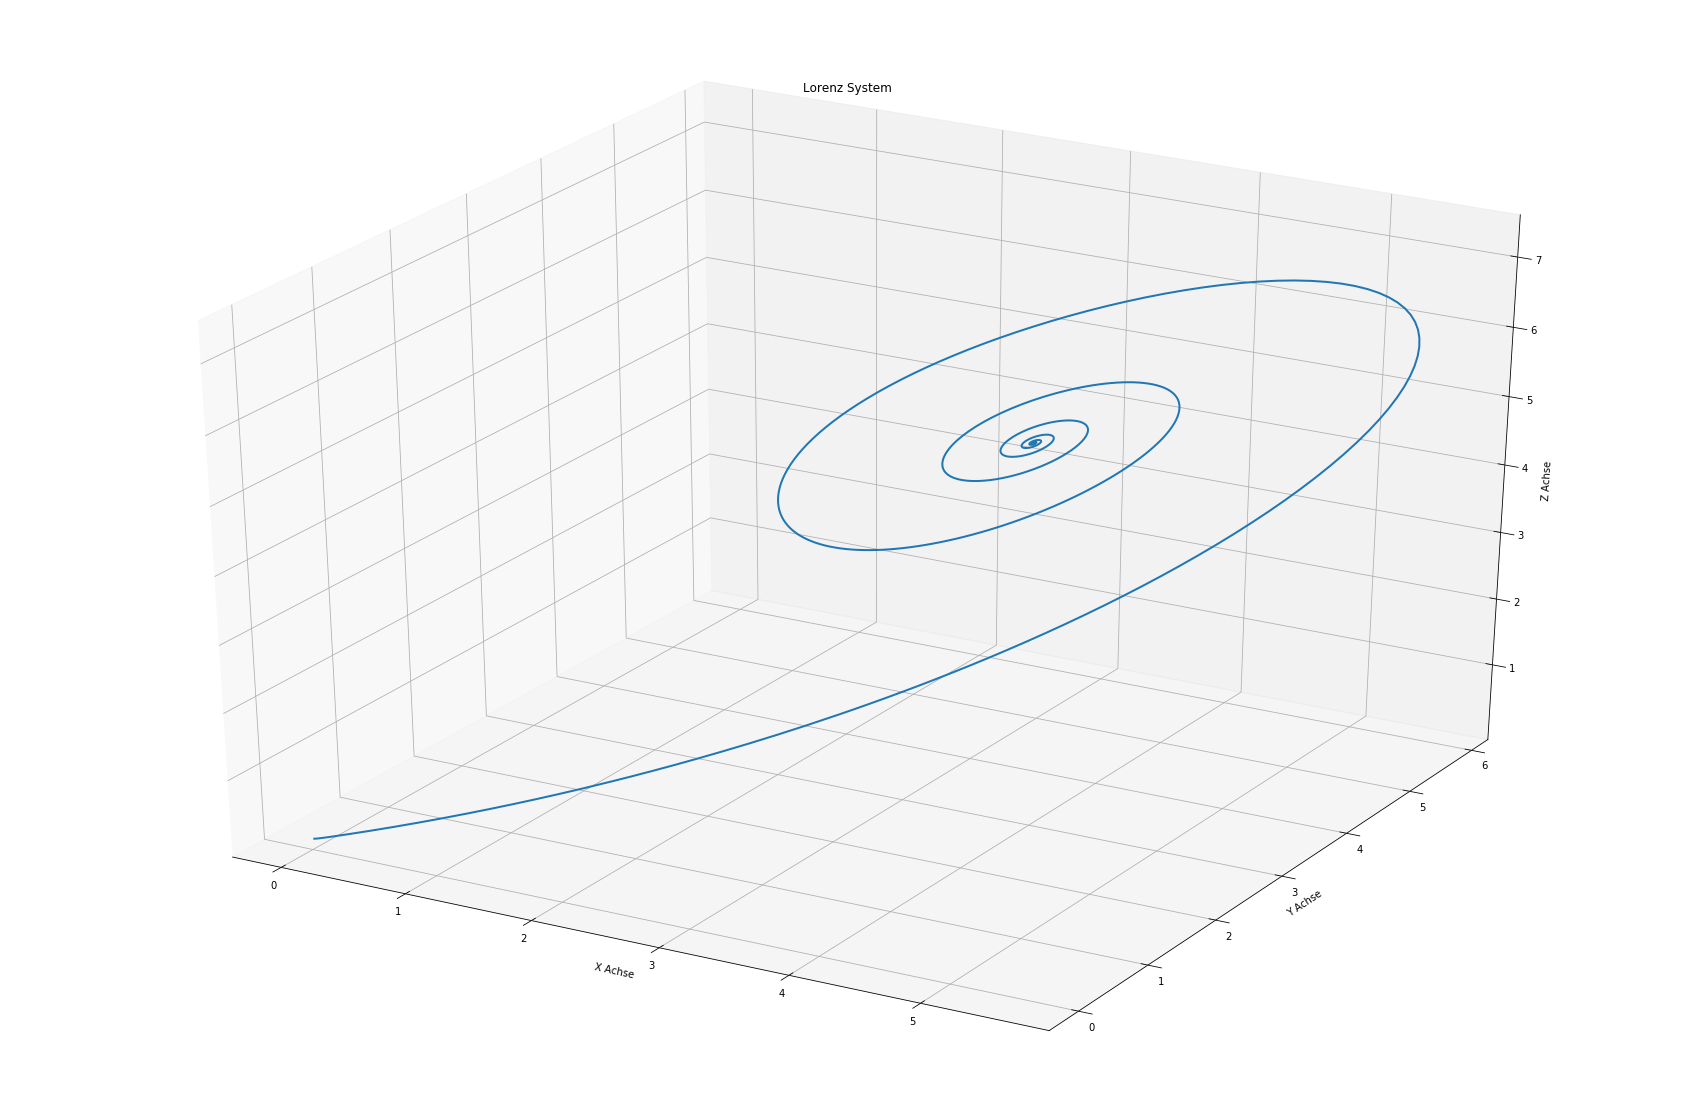

In [32]:
drawPicture(x,y,z)

- Wählen von b = 6
- Anfangswerte sehr nah am Ursprung --> Annäherung an Ursprung von negativer Seite

In [33]:
calculatePoints(10000,0.01, 10, 6, 8/3, -0.1, -0.1, -0.1)

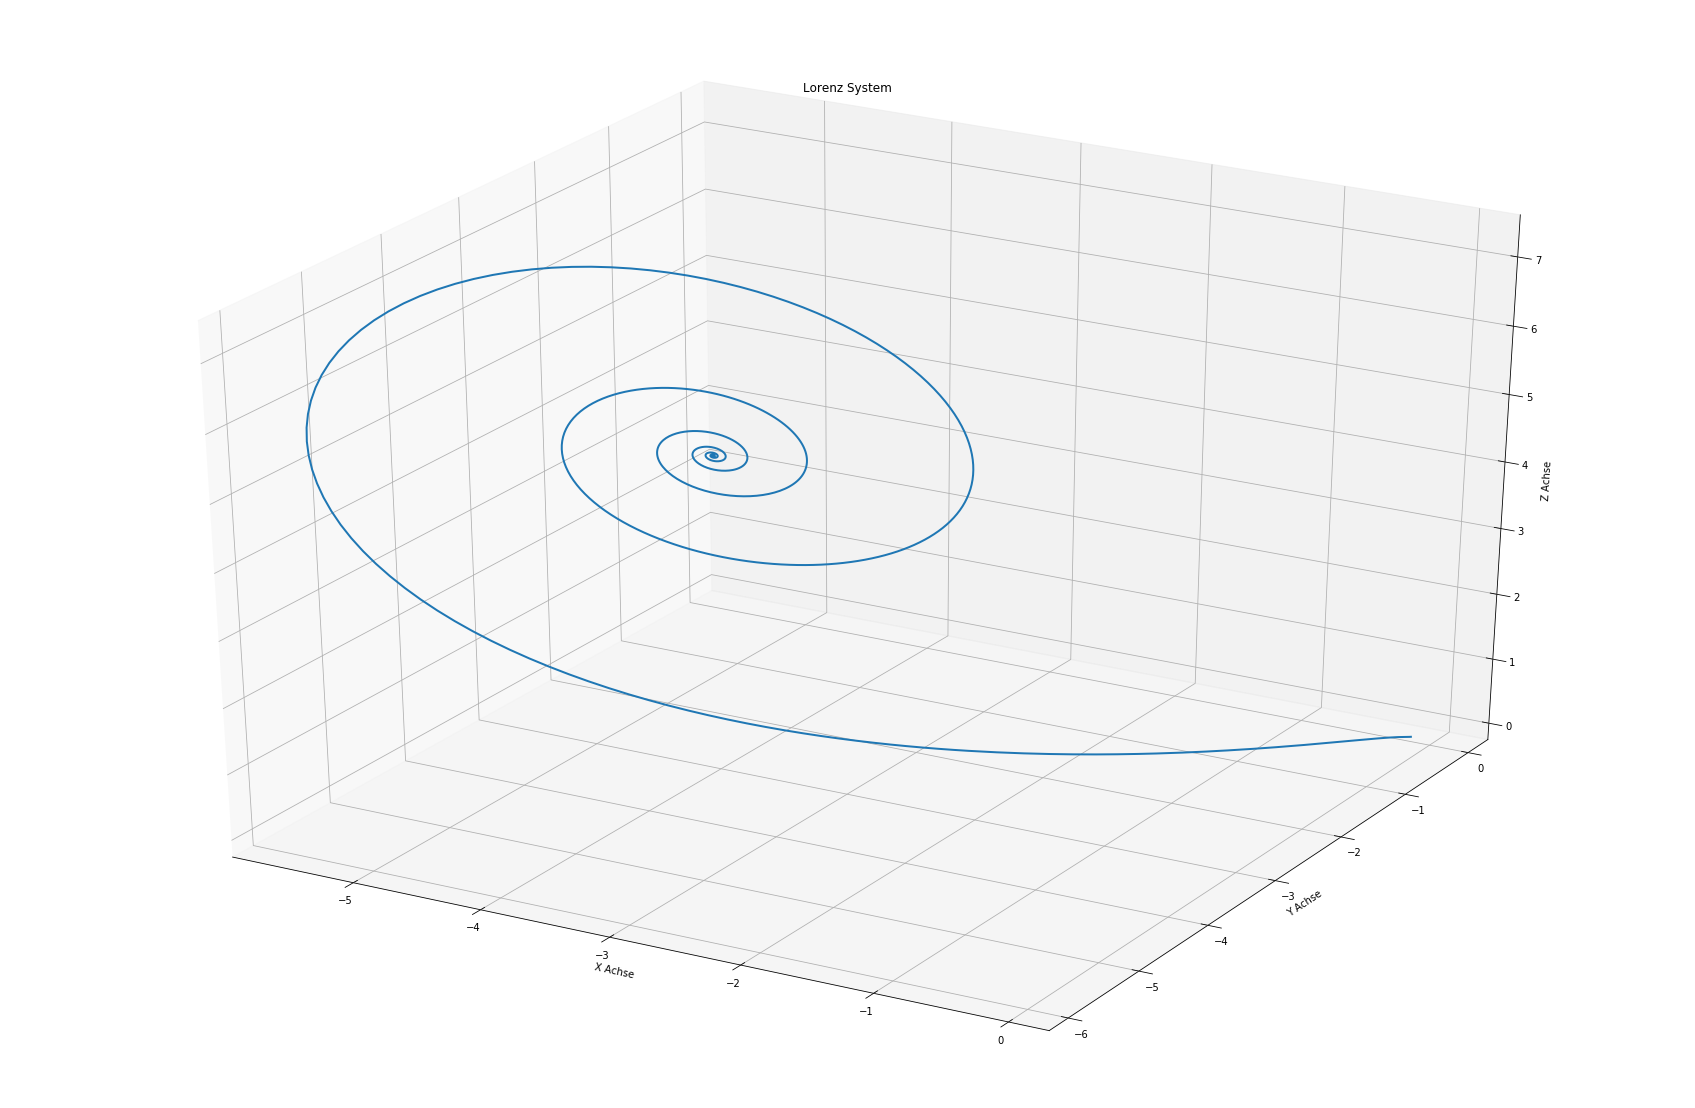

In [34]:
drawPicture(x,y,z)

# Logistische Gleichung

### Herleitung$^1$:

Die logistische Gleichung, aufgestellt von Pierre Francois Verhulst (1804-1849), stellt die Entwicklung einer Population modellhaft dar. Aus der Größe $X(n)$ der Population zu einem gewissen Zeitpunkt, soll auf die Größe $X(n+1)$ nach einer Fortpflanzungsperiode geschlossen werden. Dabei werden die Faktoren Vermehrung und Verhungern berücksichtigt.

Die neue Population wächst pro Zeitperiode um den Wachstumsfaktor $w$. Daraus ergibt sich folgende Formel für die Größe der Population nach $n+1$ Perioden:

$$ X(n+1) = X(n) \cdot w = X(0) \cdot w^{n+1} $$

wobei $X(0)$ der Startwert der Population ist, $w$ ist der Wachstumsfaktor und $n$ ist die Anzahl Fortpflanzungsperioden.

So würde eine Population unendlich wachsen. Da es aber auch beschränkende Faktoren gibt (wie z.B. Nahrungsangebot) muss es auch einen limitierenden Bremsfaktor geben. Die Überlegung ist, dass sich die Sterberate erhöht, je näher sich die Population eine theoretische Maximalgröße annähert. Mit zunehmender Sterberate beginnt nun auch die Wachstumsrate wieder zu sinken. Also muss der Wachstumsfaktor $w$ proportional zur Differenz zwischen der Maximalgröße $M$ und der aktuellen Populationsgröße $X$ sein:

$$ w = q \cdot (M-X)$$

mit $q$ als Proportionalitätskonstante.

Hängt also $w$ von der aktuellen Populationsgröße ab, so erhalten wir die logistische Gleichung $L$. Wir berechnen dabei die aktuelle Größe $X(n+1)$ aus der Populationsgröße in der Vorperiode $X_n$:

$$ X(n+1) = q\cdot(M-X(n))\cdot X(n)$$

Die nachfolgende Funktion berechnet die aktuelle Populationsgröße $X(n)$ aus eine Anfangsgröße $X0$.

In [1]:
def L(X0, M, q, n):
    """ 
    :param X0: int, Sartwert
    :param M: int, Maximalgröße der Population
    :param q: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :return: aktuelle Populationsgröße
    """
    tmp = X0
    for i in range(n):
         tmp = q*(M - tmp)*tmp
    return tmp

Die Logistische Gleichung kann nun noch umgeformt werden. Und zwar wird die Populationsgröße $X$ als Bruchteil der Maximalgröße $M$ angegeben und die Proportionalitätskonstante mit $M$ multipliziert. 

\begin{eqnarray}
    & X(n+1) &=& q\cdot(M-X(n))\cdot X(n)               &|&  X \rightarrow x \cdot M \\
    \Leftrightarrow & x(n+1)M &=& q(M-x(n)M)x(n)M \quad &|& :M \\
    \Leftrightarrow & x(n+1) &=& qM(1-x(n))x(n)         &|& qM \rightarrow r \\
    \Leftrightarrow & x(n+1) &=& r(1-x(n))x(n)
\end{eqnarray}

Die Implementierung  der umgeformten logistischen Gleichung lautet:

In [2]:
from itertools import repeat

def L(x0, r, n):
    """ 
    :param x0: int (x0 kann auch ein numpy-Array sein), Startwert
    :param r: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :return: Populationsgröße als Bruchteil der Maximalgröße
    """
    tmp = x0
    for _ in repeat(None, n):
        tmp = r*(1 - tmp)*tmp
    return tmp

### Verhalten in Abhängigkeit von r$^4$$^{,5}$:

Bei verschiedenen $r$ können die folgenden Verhaltensweisen für große $n$ beobachtet werden. Dabei hängt dieses Verhalten nicht vom Anfangswert $x_0$ ab, sondern nur von $r$.

Zuerst wollen wir die Fixpunkte der logistischen Gleichung berechnen:
\begin{eqnarray}
    & f(x^*) &=& x^* \quad ^2\\               
    \Leftrightarrow & rx^*(1-x^*) &=& x^* \\
    \Leftrightarrow & -r(x^*)^2 + rx^* - x^* &=& 0 \\
    \Leftrightarrow & x^*(-rx^* + r - 1) &=& 0 \quad \rightarrow {x_1}^*=0 \\
    \Leftrightarrow & rx^* &=& r-1 \rightarrow {x_2}^*=\frac{r-1}{r}
\end{eqnarray}



Die nachfolgende Funktion plottet die logistische Gleichung (x-Achse: Generation; y-Achse: Populationswert), sowie deren Grenzwertverhalten:

In [3]:
def plotL(x0, r, n, g):
    """ 
    :param x0: int (x0 kann auch ein numpy-Array sein), Startwert
    :param r: float, Proportionalitätskonstante
    :param n: Anzahl Fortpflanzungsperioden
    :param g: Auswahl an verschiedenen Grenzwerten 0-3 für bestimmte Bereiche von r
    :return: plottet L
    """
    toBePlotted = []
    points = []
    tmp = n
    
    if g == 0:
        toBePlotted.append(plot((g), xmax=100, xmin=0, thickness=1.0, color='blue', legend_label='Grenzwert'))
    if g == 1:
        toBePlotted.append(plot(((r-1)/r), xmax=100, xmin=0, thickness=0.7, legend_label='Grenzwert'))
    if g == 2:
        toBePlotted.append(plot((L(x0, r, tmp)), xmax=100, xmin=0, thickness=0.7, color='yellow', legend_label='Haeufungspunkt1'))
        toBePlotted.append(plot((L(x0, r, (tmp-1))), xmax=100, xmin=0, thickness=0.7, legend_label='Haeufungspunkt2'))
    if g == 3:
        toBePlotted.append(plot((L(x0, r, tmp)), xmax=100, xmin=0, thickness=0.7, color='yellow', legend_label='Haeufungspunkt1'))
        toBePlotted.append(plot((L(x0, r, (tmp-1))), xmax=100, xmin=0, thickness=0.7, color='green', legend_label='Haeufungspunkt2'))
        toBePlotted.append(plot((L(x0, r, (tmp-2))), xmax=100, xmin=0, thickness=0.7, color='brown', legend_label='Haeufungspunkt3'))
        toBePlotted.append(plot((L(x0, r, (tmp-3))), xmax=100, xmin=0, thickness=0.7, legend_label='Haeufungspunkt4'))
    
    for k in range(tmp):
        points.append((n, L(x0, r, n)))
        n = n - 1
    toBePlotted.append(list_plot(points, color='red', pointsize=5, figsize=8, axes_labels=["Generation","Population"], fontsize=6,))
    for i in range(len(points) - 1):
        toBePlotted.append(line([points[i],points[i+1]],thickness=0.5,color='black'))
    return sum(toBePlotted)

$0 <= r <= 1$:

In [4]:
import ipywidgets as widgets
from ipywidgets import interact,fixed

n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
x0_widget = widgets.FloatSlider(value=0.7, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
r_widget = widgets.FloatSlider(value=0.94, min=0.01, max=0.99, step=0.01, continuous_update=False, description='r:')
i0 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNywgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUneDA6JywgbWF4PTAuOTksIG1pbj0wLjAxLCDigKY=


Fazit: Für r-Werte zwischen 0 und 1 stirbt die Population immer aus.

$1 < r < 2$:

In [5]:
x0_widget = widgets.FloatSlider(value=0.98, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=1.18, min=1.01, max=1.99, step=0.01, continuous_update=False, description='r:')
i1 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuOTgsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen 1 und 2 nähert sich die Population monoton dem Grenzwert $\frac{r-1}{r}$ an.

$2 < r < 3$:

In [6]:
x0_widget = widgets.FloatSlider(value=0.4, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=2.9, min=2.01, max=2.99, continuous_update=False, step=0.01, description='r:')
i2 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNCwgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUneDA6JywgbWF4PTAuOTksIG1pbj0wLjAxLCDigKY=


$3 < r < (1 + \sqrt{6})$

Fazit: Für r-Werte zwischen 2 und 3 nähert sich die Population dem Grenzwert $\frac{r-1}{r}$ alternierend.

In [7]:
x0_widget = widgets.FloatSlider(value=0.68, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=3.2, min=3.0, max=3.449, continuous_update=False, step=0.01, description='r:')    
    
i3 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(2))    


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNjgsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen 3 und $1 + \sqrt{6}$ wechseln die Populationswerte zwischen zwei Häufungspunktlagern, die von r abhängen.

$(1 + \sqrt{6}) < r < 3.54$:

In [8]:
x0_widget = widgets.FloatSlider(value=0.96, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False)
r_widget = widgets.FloatSlider(value=3.53, min=3.45, max=3.54, continuous_update=False, step=0.01, description='r:')    
    
i3 = interact(plotL, x0=x0_widget, r=r_widget, n=n_widget, g=fixed(3))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuOTYsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: Für r-Werte zwischen $1 + \sqrt{6}$ und ca. $3,54$ wechseln die Populationswerte abwechselnd zwischen vier Häufungspunktlagern, die von r abhängen.

$r=3,8$:

In [9]:
x0_widget = widgets.FloatSlider(value=0.41, min=0.01, max=0.99, step=0.01, continuous_update=False, description='x0:')
n_widget = widgets.IntSlider(min=10, max=1000, step=1, value=100, continuous_update=False) 
    
i4 = interact(plotL, x0=x0_widget, r=fixed(3.79), n=n_widget, g=fixed(4))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNDEsIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J3gwOicsIG1heD0wLjk5LCBtaW49MC4wMSzigKY=


Fazit: keine Tendenzen für hohe n ersichtlich.

Beobachtungen insgesamt: Es ist zu beobachten, dass sich die Intervalle mit gleichem Grenzwertverhalten mit steigendem $r$ drastisch verkleinern und immer rascher aufeinander folgen. Ebenso wird es immer undurchsichtiger, woran sich die Populationswerte mit steigendem $n$ annähern. Tatsächlich verdoppeln sich die Häufungspunkte in den folgenden Bifurkationsintervallen immer weiter. Das Längenverhältnis zweier benachbarter Bifurkationsintervalle nähert sich dabei $δ$ an.  Man  bezeichnet $δ$  als  erste  Feigenbaumkonstante  und  erhält  sie durch$^3$: 
$$δ=\lim\limits_{n \to \infty}\frac{r_n-r_{n-1}}{r_{n+1}-r_n}=4.669201609...$$
 Bei $r$ annähernd $3,57$ beginnt Chaos. Häufungspunkte sind dann irgendwann nicht mehr erkennbar und die kleinste Änderung eines Startwertes führt zu einer komplett anderen Populationsentwicklung.

## Feigenbaumdiagramm

Dies führt uns zum Feigenbaumdiagramm. Ein Feigenbaumdiagramm entsteht durch Aufzeichnen der Wertepaare $(r, x)$. Man waehlt fuer das Diagramm eine bestimmte Anzahl von Iterationen $n$, die dann fuer alle berechneten Punkte des Diagrammes beibehalten wird. Fuer jeden Wert $r$ werden dann eine Reihe von $x0$ Startwerten zwischen 0 und 1 ausgewaehlt.

In [10]:
# Import für widgets
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display

# Import für numpy-Arrays
import numpy as np

# Import für Timer
import time

# Zufallsgenerator für Zahlen zwischen 0 und 1.
from random import random  

global myText

def FeigenbaumPoints(n, x0Amount, rAmount, rmin, rmax):

    print("\f")
    starttime = time.time()
    
    """
    :param n: Iterationen/Generationen n
    :param x0Amount: Anzahl an Startwerten für jeden r-Wert
    :param rAmount: Anzahl r-Werte
    :param rmin: kleinster r-Wert
    :param rmax: größter r-Wert
    """
    
    global punkte
    
    rs = None  # array für die r-Koordinaten
    ls = None  # array für die Populationswerte
    x0 = np.linspace(0, 1, x0Amount) # Liste von Startwerten
    
    p = 0  # Zähler für Punkte
    for r in np.linspace(rmin, rmax, rAmount):
        
        p += x0Amount
        
        myText.value = "r = {0:.3f}, berechnete Punkte={1:d}".format(r, p)
        
        # Array von r-Koordinaten
        if rs is None:
            rs = np.full((x0Amount, 1), r)
        else:
            rs = np.vstack((rs, np.full((x0Amount, 1), r)))  # Liste anhängen
            
        # Berechnung für nächstes r mit allen Startwerten x0
        x_val = np.array(L(x0, r, n)).reshape((x0Amount, 1))
        
        # Array von x-Werten
        if ls is None:
            ls = x_val
        else:
            ls = np.vstack((ls, x_val))  # Liste anhängen
    
    punkte = np.hstack((rs, ls)) # Zusammenfügen von rs und ls zu einer Liste von Punkten
    endtime = time.time()
    print("Zeit: {0:.2f}s\nBereit zum plotten.".format(endtime-starttime))   
    

def PlotFeigenbaum(dotsize, transparent):
    """
    :param points: Array von Punkten, das geplottet werden soll.
    :param dotsize: Wertebereich sollte zwischen 1 und 5 liegen.
    :param transparent: Wertebereich sollte zwischen 0 und 1 liegen. - je mehr x0-Werte für ein r berechnet werden, desto kleiner sollte dieser Werte sein.
    """
    plot = list_plot(punkte, pointsize=dotsize, alpha=transparent, figsize=10, axes_labels=["R","X(n)"])
    plot.save("Feigenbaum.png")
    show(plot)


In [11]:
print("Bitte erst Konfiguration einstellen bzw. annehmen und erst dann plotten.")
myText = widgets.Text()
display(myText)


n_widget = widgets.IntSlider(min=10, max=10000, step=1, value=1000, continuous_update=False)
x0_widget = widgets.IntSlider(min=10, max=10000, step=1, value=300,continuous_update=False)
rA_widget = widgets.IntSlider(min=100, max=3000, step=1, value=1000, continuous_update=False)
rmin_widget = widgets.FloatSlider(value=2.8, min=1.0, max=3.95, step=0.0001, continuous_update=False, description='rMin:')
rmax_widget = widgets.FloatSlider(value=4.0, min=1.05, max=4.0, step=0.0001, continuous_update=False, description='rMax:')

interact_config=interact_manual.options(manual_name="Annehmen")
i = interact_config(FeigenbaumPoints, n=n_widget, x0Amount=x0_widget, rAmount=rA_widget, rmin=rmin_widget, rmax=rmax_widget)


dotsize_widget = widgets.FloatSlider(value=1.0, min=1, max=5.0, step=0.01, continuous_update=False, description='Pointsize:')
transparent_widget = widgets.FloatSlider(value=0.3, min=0.01, max=1.0, step=0.01, continuous_update=False, description='Transparenz:')

interact_plot=interact_manual.options(manual_name="Plotten")
i2 = interact_plot(PlotFeigenbaum, dotsize=dotsize_widget, transparent=transparent_widget)


Bitte erst Konfiguration einstellen bzw. annehmen und erst dann plotten.


Text(value=u'')

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMDAwLCBjb250aW51b3VzX3VwZGF0ZT1GYWxzZSwgZGVzY3JpcHRpb249dSduJywgbWF4PTEwMDAwLCBtaW49MTApLCBJbnTigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUnUG9pbnRzaXplOicsIG1heD01LjAsIG1pbj3igKY=


Beobachtungen: Im Feigenbaum erkennt man die oben beschriebenen Abschnitte wieder. Die gabelförmigen Abschnitte stellen jeweils eine Verhaltensänderung im System dar (siehe Änderung der Anzahl Häufungspunkte oben). Man erkennt auch, dass die Intervalle zur nächsten Gabelung jeweils kleiner werden und die Anzahl Gabelungen (Bifurkationen) sich mit steigendem $r$ immer wieder verdoppelt. Ab ca. $3,6$ existiert fast ein Kontinuum von Werten für ein r, woran man sieht das schon kleinste Änderungen im Startwert $x0$ komplett unterschiedliche Ergebnisse hervorbringen (im Einzelfall natürlich noch deterministisch, d.h. für einen einzeln Wert $x0$ bzw. r wird immer dasselbe Ergebnis herauskommen), wohingegen davor $x0$ überhaupt keinen Einfluss hatte (bei großen $n$ natürlich). Mit weiter steigendem r sind dann ab dem Wert 4 alle Populationswerte zwischen 0 und 1 vorhanden und eine Tendenz nicht erkennbar$^6$. Interessant ist noch, das inmitten des Chaos "kleine Inseln der Ordnung" zu finden sind, z.b. um den r-Wert $3,8$.

#### periodische "Fenster":

Vergrößert man diese Bereiche, so stößt man auf kleinere Feigenbäumchen.

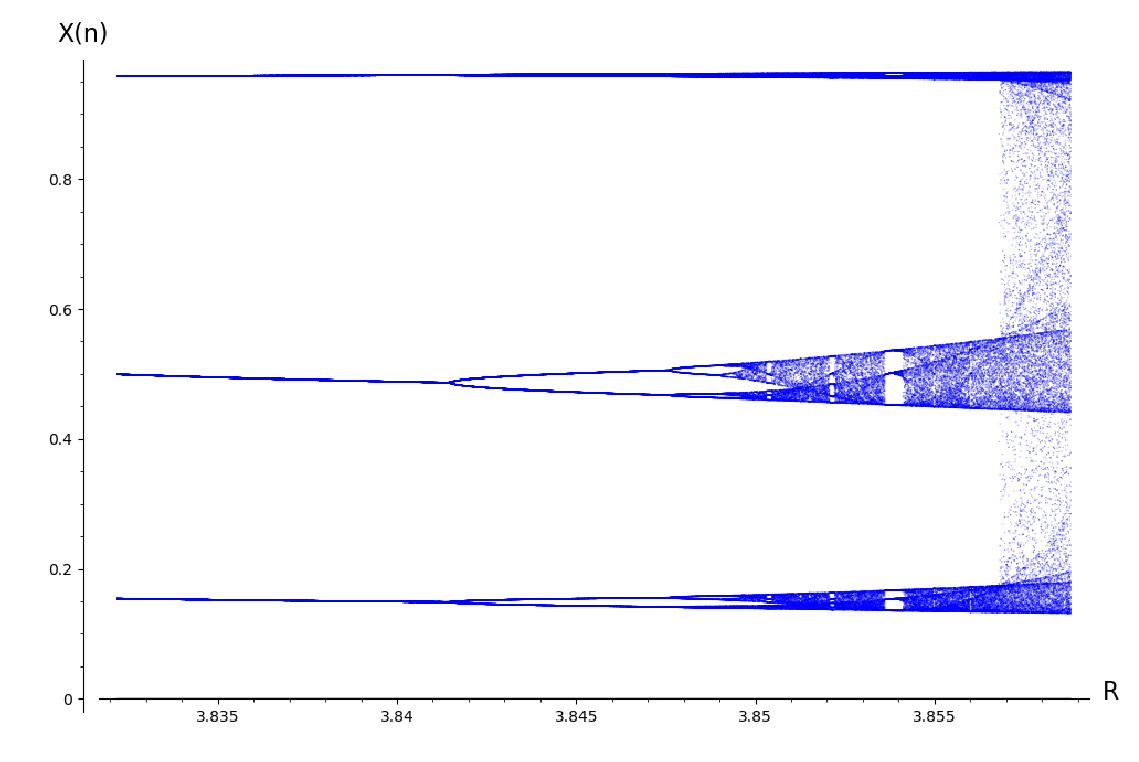

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('Ordnungsinsel 3,87.png')
plt.figure(figsize=(20,12), dpi=80)
plt.axis("off")
imgplot = plt.imshow(img)


Dieses Auftreten derselben grundlegenden Merkmale wird als Selbstähnlichkeit bezeichnet und ist eine typische Eigenschaft der Fraktale.$^7$

### Quellen zu logistischer Gleichung und Feigenbaumdiagramm:
$^1$: Pierre-François Verhulst: Notice sur la loi que la population suit dans son accroissement. In: Correspondance Mathématique et Physique. Band 10, 1838


$^2$: Robert May: Simple mathematical models with very complicated dynamics Nature V. 261, S. 460, 10 Juni 1976

$^3$: Keith Briggs: A precise calculation of the Feigenbaum constants. Mathematics of Computation 57, Juli 1991, S. 435–439

$^4$: Nagashima, H., Baba, Y., Introduction to Chaos, IOP Publishing Ltd., Bristol and Philadelphia, 1999

$^5$: http://www.bio-physics.at/wiki/index.php?title=Logistische_Gleichung

$^6$: Loistl, O., Chaostheorie - zur Theorie nicht linearer dynamischer Systeme, München, S. 31, 1996

$^7$: http://www.fraktalwelt.de/systeme/fa_chaos.pdf

# Mandelbrotmenge 

Die Mandelbrotmenge besteht aus komplexen Zahlen, welche das folgende Kriterium erfüllen.

##### Kriterium:
Man Betrachtet eine komplexe Zahl $c$ aus der komplexen Ebene (x-Achse realer Anteil, y-Achse imaginärer Anteil).
Um zu prüfen ob $c$ innerhalb der Mandelmenge $\mathbb{M}$ liegt, führen wir folgende rekursiv definierte Formel aus:

$z_0=0$

$z_{n}=z_{n-1}^2+c\;\;\vert\;\; n \in \mathbb{N}$

$c \in \mathbb{M} \Leftrightarrow  \vert z_n\vert \le 2$   (wenn $ \vert z_n\vert > 2$ ist, geht $z_n$ bei weiteren Iterationen schnell gegen Unendlich)

Da wir nicht unendlich viele Iterationen durchführen können, begrenzen wir $n$ auf maxmimal 100 Iterationen, um zu prüfen, ob $c$ innerhalb von $\mathbb{M}$ liegt. Je größer wir dieses Limit setzten, desto genauer wird klassifiziert welches $c\in \mathbb{M}$.

##### Graphische Darstellung:
Man legt ein Pixelraster über die komplexe Ebene, in der die Mandelbrotmenge auftaucht(Reele-Achse -2 bis 1, Imaginäre-Achse -1 bis 1). Jedes Pixel repäsentiert eine Zahl $c$ aus der Ebene, für die man nun berechnet, ob das Kriterium $\vert z_n\vert \le 2$ gilt. Je schneller $z_n$ gegen Unendlich läuft, und somit $c\notin\mathbb{M}$, desto weniger Iterationen müssen durchgeführt werden. Nun speichert man im Pixel ab, wieviele Iterationen die Zahl $c$ benötigt hat. Diese Zahl, zwischen 0 und $n$, wird dann in einer Colormap einer Farbe zugeordnet. 

#### Quelle: 
https://www.informatik.uni-leipzig.de/~meiler/Schuelerseiten.dir/DPlotzki/html/mndlbrt.htm

https://www.mathematik.ch/anwendungenmath/fractal/julia/

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#f(z)=z*z+c --> f**n(z) [n=Iterationen] 
#c element der Mandelbrotmenge, wenn |f**n(z)| <=2 für alle n>=0 
#Wenn |f**n(z)| >2 wird das Ergebnis unendlich nach einigen Iterationen
#Parameter: Reeler- und Imaginärerteil von c und die maximale Anzahl der Iterationen
#Liefert die Anzahl an Iterationen --> Je kleiner desto schneller lief der Wert gegen Unendlich
def mandelbrot(re,im,max_iterations):
    c=complex(re,im)
    #z0=0
    z=complex(0,0)
    for i in range(max_iterations):
        #zn+1=z**2+c
        z=z*z+c
        #Performance-Technisch kein Wurzel ziehen
        if((z.real*z.real+z.imag*z.imag)>4):
            #i[=die anzahl an iterationen] repräsentiert wie schnell z am punkt c gegen unendlich läuft
            return i
    #Ging nicht über die Grenze raus --> Innerhalb Mandelbrotmenge
    return max_iterations

#Parameter x und y Auflösung
#Liefert 2D array der die Pixel des Bildes repräsentieren
#Inhalt des arrays sind Zahlen von 0-100, die dann durch colormapping in Farben umgewandelt werden
#Die Mandelbrotmenge erscheint im reelen Teil zwischen -2 und 1 und im imaginären Teil zwischen -1 und 1
def mandelbrot_set(xRes,yRes):
    #array größe festlegen und mit Nullen füllen
    result = np.zeros([yRes,xRes])
    #wir gehen über eine Liste an Werten --> die Werte gehen von 1 bis -1 
    #wobei der 3.Parameter angibt, wie viele Werte in der Liste sein sollen.
    #enumerate liefert ein Wertetupel (Iteration, Wert aus der liste) --> (row_index , im)
    for row_index, im in enumerate(np.linspace(1,-1,yRes)):
        #wie vorhin nur mit -1 und 1
        for column_index, re in enumerate(np.linspace(-2,1,xRes)):
            #Somit nimmt re und im alle Punkte in unserem Koordinatensystem an, welche dann in farbige Pixel umgewandelt werden
            #Nun müssen wir jede Pixelfarbe errechnen mittels der Funktion mandelbrot(re,im,max_iterationen)
            #max_iterationen=100, da wir colormapping von 0-100 nutzen
            result[row_index,column_index]=mandelbrot(re,im,100)
    return result

#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
def draw_mandelbrot_set(DPI,xRes,yRes,color):
    plt.figure(dpi=DPI)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.imshow(mandelbrot_set(xRes,yRes),cmap=color,extent=[-2,1,-1,1],vmin=0,vmax=100)
    return plt.show()

KeyboardInterrupt: 

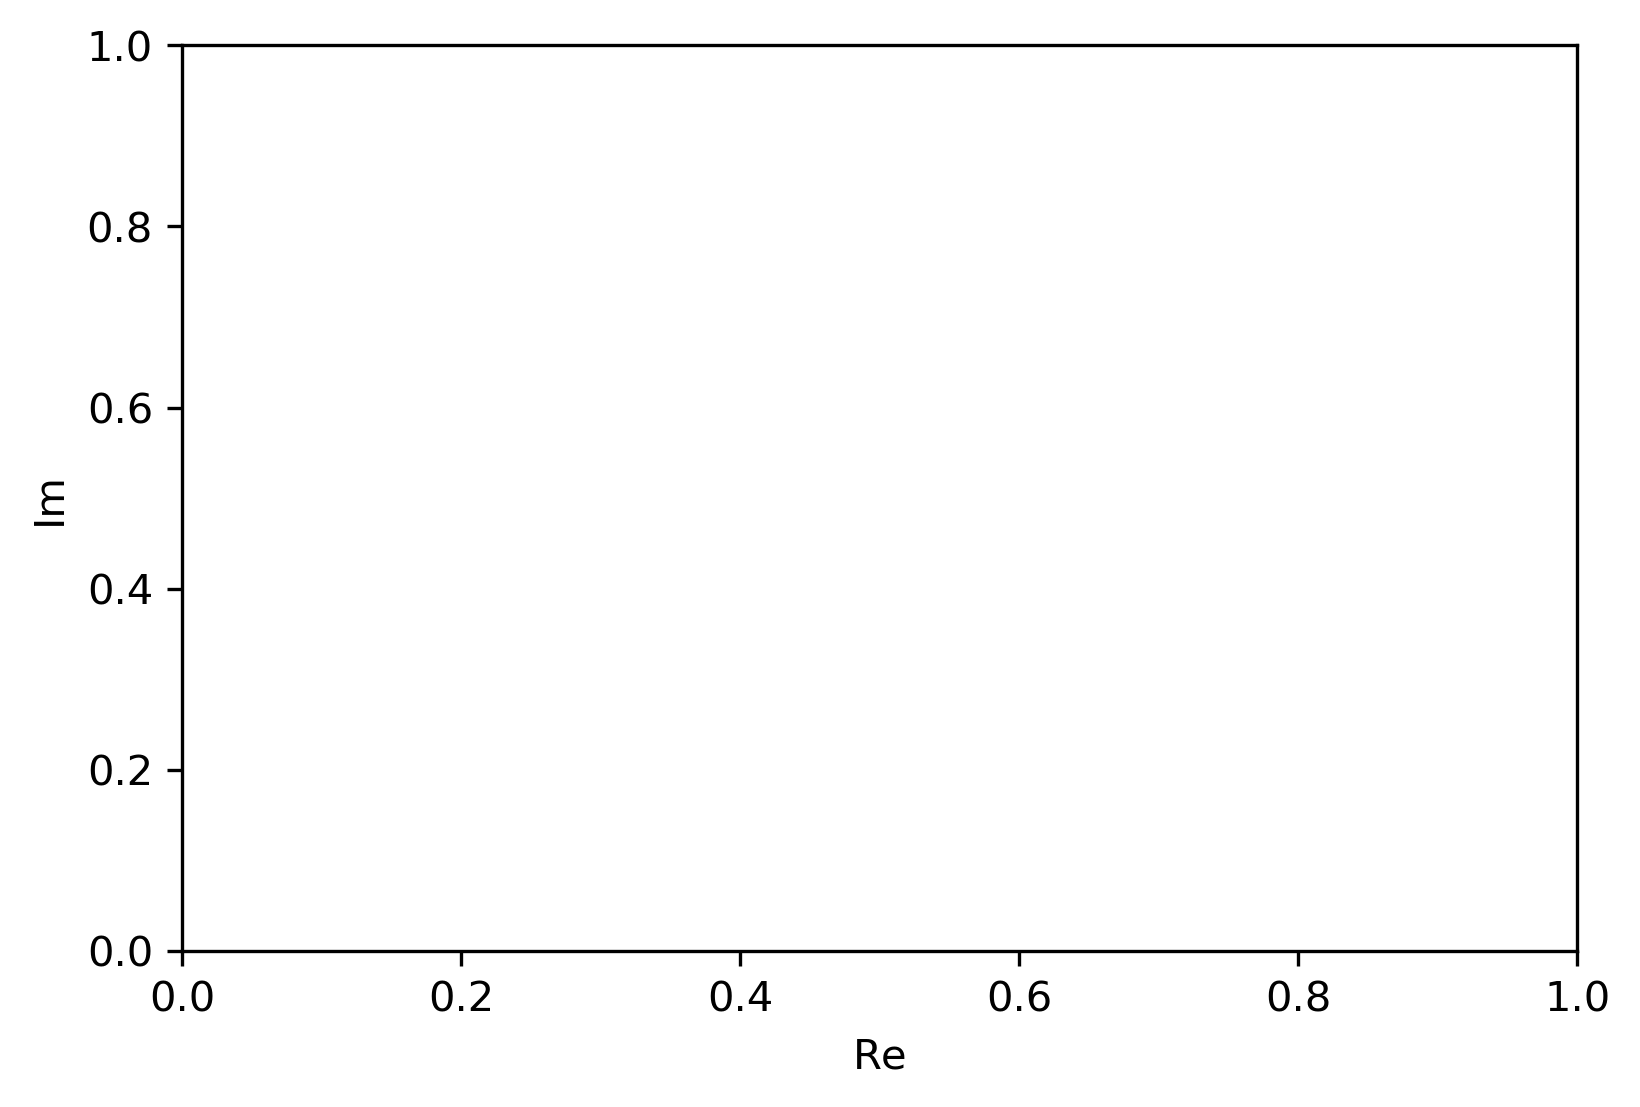

In [38]:
draw_mandelbrot_set(300,1920,1080,'hot')

# Juliamenge

Die Juliamenge wird ähnlich wie die Mandelbrotmenge erzeugt, jedoch ist $c$ für alle Iterationen fest. Man verändert lediglich den Startwert $z_0$. Dieser nimmt nun jeden Punkt der komplexen Zahlenebene an. 


##### Graphische Darstellung:
Die graphische Darstellung läuft wie bei der Mandelbrotmenge ab, wobei die Juliamenge auf der Reelen- und Imaginären-Achse zwischen -1.5 und 1.5 erscheint.
Der Pixel repräsentiert nun $z_0$ und wird wieder entsprechend der Anzahl der Iterationen eingefärbt.

#### Quelle: 
https://www.informatik.uni-leipzig.de/~meiler/Schuelerseiten.dir/DPlotzki/html/mndlbrt.htm

https://www.mathematik.ch/anwendungenmath/fractal/julia/

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [39]:
import numpy as np
import matplotlib.pyplot as plt

#Berechnung sehr ähnlich zur Mandelbrotmenge
#, jedoch nehmen wir nun ein festes c in der Formel und übergeben jedesmal einen variablen Startwert z0
def julia(zRe,zIm,cRe,cIm,max_iterations):
    c=complex(cRe,cIm)
    z=complex(zRe,zIm)
    for i in range(max_iterations):
        z=z*z+c
        if((z.real*z.real+z.imag*z.imag)>4):
            return i
    return max_iterations

#Wie bei der Erstellung des arrays für die Mandelbrotmenge
#,jedoch übergibt man hier einen festen Punkt c für die Juliamenge
def julia_set(xRes,yRes,cRe,cIm):
    result = np.zeros([yRes,xRes])
    for row_index, im in enumerate(np.linspace(-1.5,1.5,num=xRes)):
        for column_index, re in enumerate(np.linspace(-1.5,1.5,num=yRes)):
            result[row_index,column_index]=julia(re,im,cRe,cIm,100)
    return result

#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
def draw_julia_set(DPI,xRes,yRes,color,xPoint,yPoint):
    plt.figure(dpi=DPI)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.imshow(julia_set(xRes,yRes,xPoint,yPoint),cmap=color,extent=[-1.5,1.5,-1.5,1.5],vmin=0,vmax=100)
    return plt.show()

In [ ]:
draw_julia_set(450,2000,2000,'viridis',-0.554,-0.5658)

# Relation zwischen Mandelbotmenge und Juliamenge

Die Mandelbrotmenge ist die Menge der Parameter $c$ für welche die Rekursion $ z_{n+1}=z_{n}^{2}+c$ beschränkt bleibt, wenn man $z_{0}=0$ wählt. Jeder Punkt $c$ in der komplexen Ebene entspricht einer Juliamenge.

##### Graphische Darstellung:
Man markiert $c$ auf der Mandelbrotmenge und baut daneben die entsprechende Juliamenge für $c$ auf. Wenn nun $c$ bewegt wird, erzeugt man interessant zu beobachtende Veränderungen der Juliamenge.

Erzeugt man nun von jedem Punkt $c$ in der komplexen Ebene die Juliamenge und fügt diese Bilder an ihrem Punkt erneut zu einem Bild zusammen, bilden diese Juliamengen die Mandelbrotmenge.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import os

#Mandelbrotmengen array bilden, jedoch am bestimmten Punkt ein Rechteck zur Markierung des Punktes bilden.
#Nutzung: Veranschaulichung der Relation zwischen Julia- und Mandelbrotmenge
def mandelbrot_setWithPoint(xRes,yRes,xRe,yIm,sizeFactor):
    result = np.zeros([yRes,xRes])
    if(sizeFactor<=3):
        sizeFactor=4
    for row_index, im in enumerate(np.linspace(1,-1,num=yRes)):
        for column_index, re in enumerate(np.linspace(-2,1,num=xRes)):
            #Sind wir innerhalb des Bereichs des Rechteck?
            if((re >= xRe-(sizeFactor/xRes) and re<=xRe+(sizeFactor/xRes))and(im >= yIm-((sizeFactor*2/3)/yRes) and im <= yIm+((sizeFactor*2/3)/yRes))):
                #Inneren Part des Rechtecks im array auf 100 färben
                if((re >= xRe-((sizeFactor-3)/xRes) and re<=xRe+((sizeFactor-3)/xRes))and(im >= yIm-(((sizeFactor*2/3)-3)/yRes) and im <= yIm+(((sizeFactor*2/3)-3)/yRes))):
                    result[row_index,column_index]=100
                #Äußeren Parte des Rechtecks auf 0 färben --> Um einen Kontrast zu generieren, damit man überall die Markierung sieht
                else: 
                    result[row_index,column_index]=0
            #Restlichen Bereich normal einfärben
            else:
                result[row_index,column_index]=mandelbrot(re,im,100)
    return result

#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
def draw_mandelbrot_set_withPoint(DPI,xRes,yRes,color,xPoint,yPoint,size):
    plt.figure(dpi=DPI)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.imshow(mandelbrot_setWithPoint(xRes,yRes,xPoint,yPoint,size),cmap=color,extent=[-2,1,-1,1],vmin=0,vmax=100)
    return plt.show()

#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html --> Hot / viridis / jet 
def animateMandelbrot_Set(xRes,yRes,picNmbr,coefficient,color,size):
    #Speichert die Animation einer Reihe von Bildern als gif ab. 
    #Die Liste enthält Bilder der markierten Mandelbrotmenge
    #Die markierte Mandelbrotmenge erhält eine komplexe Zahl in trigonometrische Polardarstellung [r*(cos(alpha)+sin(alpha)*i)]
    #, welche um einen Koeffizienten [r] modifiziert wurde. alpha nimmt alle werte zwischen 0 und 2*pi an.
    #Somit lässt sich ein gif erstellen, wo bei sich der markierte Punkt im Kreis dreht
    animation.ArtistAnimation(plt.figure(dpi=350), [[plt.imshow(mandelbrot_setWithPoint(xRes,yRes,coefficient*np.cos(a),coefficient*np.sin(a),size),cmap=color,extent=[-2,1,-1,1],animated=true)]for counter,a in enumerate(np.linspace(0,2*np.pi,picNmbr))], interval=60, blit=True,repeat_delay=0).save('MandelbrotSet.gif')
    return 'Saved as File: MandelbrotSet.gif'

#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html --> Hot / viridis / jet 
def animateJulia_Set(xRes,yRes,picNmbr,coefficient,color):
    #Speichert die Animation einer Reihe von Bildern als gif ab. 
    #Die Liste enthält Bilder der Juliamenge
    #Die Juliamenge erhält eine komplexe Zahl in trigonometrische Polardarstellung [r*(cos(alpha)+sin(alpha)*i)]
    #, welche um einen Koeffizienten [r] modifiziert wurde. alpha nimmt alle werte zwischen 0 und 2*pi an.
    #Somit lässt sich ein gif erstellen, in dem sich die Juliamenge anschaulich verändert 
    #und wieder in die ursprüngliche Form zurückgeht.
    #Wenn man dazu die markierte Mandelbrotmenge animiert
    #, sieht man von welchem Punkt der Mandelbrotmenge die Juliamenge abstammt.
    animation.ArtistAnimation(plt.figure(dpi=350), [[plt.imshow(julia_set(xRes,yRes,coefficient*np.cos(a),coefficient*np.sin(a)),cmap=color,extent=[-1.5,1.5,-1.5,1.5],animated=true)]for counter,a in enumerate(np.linspace(0,2*np.pi,picNmbr))], interval=60, blit=True,repeat_delay=0).save('JuliaSet.gif')
    return 'Saved as File: JuliaSet.gif'

#Erzeugt eine Juliamenge an c und setzt das Bild der Juliamenge auf c
def mandelbrotOutOfJulia(xIms,yIms,ImRes,color):
    tmpFolder='JuliaSetsTmp'
    os.mkdir(tmpFolder)
    for row_index,im in enumerate(np.linspace(1,-1,yIms)):
        for column_index,re in enumerate(np.linspace(-2,1,xIms)):
            plt.imsave(tmpFolder+'\\'+str(row_index)+'-'+str(column_index)+'juliaset.png',julia_set(ImRes,ImRes,re,im),cmap=color,vmin=0,vmax=100)
    csv=Image.new('RGB',(ImRes*xIms,ImRes*yIms))
    for row_index in range(0,yIms):
        for column_index in range(0,xIms):
            csv.paste(Image.open(tmpFolder+'\\'+str(row_index)+'-'+str(column_index)+'juliaset.png'),(column_index*ImRes,row_index*ImRes))
            os.remove(tmpFolder+'\\'+str(row_index)+'-'+str(column_index)+'juliaset.png')
    os.rmdir(tmpFolder)
    csv.save('MandelbrotsetMadeOutOfJuliasets.png')
    return csv



In [ ]:
draw_mandelbrot_set_withPoint(350,900,600,'viridis',-0.554,-0.5658,15)

In [ ]:
animateJulia_Set(1000,1000,500,0.759,'viridis')

In [ ]:
animateMandelbrot_Set(900,600,350,0.7886,'hot',15)

In [ ]:
mandelbrotOutOfJulia(18,12,750,'hot')

# Selbstähnlichkeit und Apfelmännchen

## Selbstähnlichkeit:
- Ein Objekt ist selbstähnlich, wenn es nach einer Vergrößerung der ursprünglichen Struktur ähnelt.
- Objekte in der Mathematik, die selbstähnlich sind, nennt man Fraktale.

Quelle: http://www.natur-struktur.ch/fraktale/selbstaehnlich.html

#### Exakte Selbstähnlichkeit:
- Von exakter Selbstähnlichkeit ist die Rede, wenn die Repetition der gesamten Struktur, sich bis ins unendliche wiederholt. Ein Beispiel dafür ist die Kochsche Kurve.
- Eine exakte Selbstähnlichkeit kann nur bei Objekten auftreten, die durch mathematische Algorithmen erzeugt wurden.
#### Selbstähnlichkeit in der Natur:
- Die Wiederholung der selben Struktur setzt sich in der Natur nur bis zu einem gewissen Grad fort.
- Beispiele sind ein Farn, der Romanesco (Kohlsorte) oder Blutgefäße einer Niere. 

Quelle: https://marbec14.wordpress.com/2015/10/25/selbstaehnlichkeit-die-struktur-der-fraktale-und-die-fibonacci-spiralen/

#### Romanesco - Kohl

In [41]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://ben.design/wp-content/uploads/2016/04/die-geometrie-der-natur_489x329.jpg")

In [42]:
Image(url="http://2.bp.blogspot.com/-VlbUAeJsaJ0/U2ViRk45zbI/AAAAAAAAPU0/jN1xkMBAszs/s1600/Ferns_Leaf1.jpg")

## Definition Apfelmännchen:
Die grafische Darstellung der Mandelbrotmenge wurde durch die Bremer Forschungsgruppe für komplexe Dynamik Apfelmännchen genannt. Auch im umgangssprachlichen Gebrauch wird die Mandelbrotmenge oft Apfelmännchen genannt.

Quelle: https://mathematikalpha.de/apfelmaennchen-mandelbrotmenge

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime 

countPic = 0
#Parameter x und y Auflösung, sowie die 4 Werte (x1,x2,y1,y2) eines Zoomabschnitts
#Liefert ein 2D Array, welches die Pixel des Bildes repräsentiert.
#Inhalt des Arrays sind Zahlen von 0-100, die dann durch Colormapping in Farben umgewandelt werden.
#Die Mandelbrotmenge erscheint im reellen Teil zwischen -2 und 1 und im imaginären Teil zwischen -1 und 1.
def mandelbrot_set_parameter(xRes,yRes, x1, x2, y1, y2):
    #Array Größe festlegen und mit Nullen füllen
    result = np.zeros([yRes,xRes])
    #wir gehen über eine liste an Werten --> die Werte gehen von 1 bis -1, 
    #wobei der 3.Parameter angibt, wie viele Werte in der Liste sein sollen.
    #enumerate liefert ein Wertetupel (iteration, wert aus der liste) --> (row_index , im)
    for row_index, im in enumerate(np.linspace(y2,y1,yRes)):
        #wie vorhin nur mit -1 und 1
        for column_index, re in enumerate(np.linspace(x1,x2,xRes)):
            #Somit nimmt re und im alle Punkte in unserem Koordinatensystem an, welche dann in farbige Pixel umgewandelt werden
            #Nun müssen wir jede Pixelfarbe errechnen mittels der Funktion mandelbrot(re,im,max_iterationen)
            #max_iterationen=100 da wir colormapping von 0-100 nutzen
            result[row_index,column_index]=mandelbrot(re,im,300)
    return result

#Funktion, die die abgewandelte Funktion mandelbrot_set_parameter benutzt und den angegebenen Bildausschnitt 
#ausgibt.
def draw_mandelbrot(x1, x2, y1, y2):
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.figure(dpi=300)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.imshow(mandelbrot_set_parameter(900,600, x1, x2, y1, y2),cmap='hot',extent=[x1,x2,y1,y2])
    plt.show()
    

#Funktion, die eine Liste aus Zoomausschnitten (je Zoomausschnitt 4 Werte: x1,x2,y1,y2) erhält und das Bild 
#im Ordner des Notebooks abspeichert. Printed die Anzahl der bereits abgespeicherten Bilder aus.
#Die Funktion nutzt eine abgewandelte und parametrisierte Version der Methode mandelbrot_set.
#Genutzte Funktion: mandelbrot_set_parameter
def animateApfelmaennchenZoom(liste):
    global countPic
    plt.figure(dpi=300)
    plt.xticks([])
    plt.yticks([])
    length = len(liste)
    numberPic = length/4
    i = 0
    #In einer Schleife werden die Bilder erzeugt und abgespeichert.
    for pictures in range(0,numberPic):
        print('Bild wird erzeugt')
        start_time = datetime.now() 
        plt.imshow(mandelbrot_set_parameter(900,600, liste[i], liste[i + 1], liste[i + 2], liste[i + 3]),cmap='hot',extent=[liste[i], liste[i + 1], liste[i + 2], liste[i + 3]])
        plt.savefig('{}1000{}_picture.png'.format(countPic,pictures))
        time_elapsed = datetime.now() - start_time 
        print(pictures)
        print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
        i = i + 4
    countPic = countPic + 1
    return  'All pictures created!'

#Funktion, die eine Liste aus Punkten erstellt. 4 aufeinanderfolgende Punkte, stellen dann eine Zoomphase und
#damit ein Bild da. 
#Die Funktion erhält 9 Parameter. Die ersten 4 stellen den Startzoomausschnitt dar und die nächsten vier
#die letzte Vergrößerung. Der letzte Parameter bekommt die Anzahl der Bilder, die erzeugt werden sollen, pro Zoom.
#Jeder Zoomausschnitt ist durch vier Parameter gekennzeichnet. Die Werte x1 und x2, welche 
#den Bereich auf der x-Achse eingrenzen und die Werte y1 und y1, welche den Bereich auf der y-Achse eingrenzen.
#Gibt die Liste zurück.
def createZoomListe(x1Start, x2Start, y1Start, y2Start, x1Ende, x2Ende, y1Ende, y2Ende, numPic):
    liste = [x1Start,x2Start,y1Start,y2Start]
    intervallx1 = x1Start - x1Ende
    intervallx2 = x2Start - x2Ende
    intervally1 = y1Start - y1Ende
    intervally2 = y2Start - y2Ende
    stepX1 = intervallx1/numPic
    stepX2 = intervallx2/numPic
    stepY1 = intervally1/numPic
    stepY2 = intervally2/numPic
    for i in range(1, numPic + 1):
        liste.append(x1Start - i*stepX1)
        liste.append(x2Start - i*stepX2)
        liste.append(y1Start - i*stepY1)
        liste.append(y2Start - i*stepY2)
    return liste

#Funktion, die als Paramter die Liste der einzelnen "Zoomphasen" (Zoomausschnitte) erhält und die einzelnen Bilder 
#anschließend ausgibt. Jeder Zoomausschnitt ist durch vier Parameter gekennzeichnet. Die Werte x1 und x2, welche 
#den Bereich auf der x-Achse eingrenzen und die Werte y1 und y1, welche den Bereich auf der y-Achse eingrenzen.
#Die Funktion iteriert über die Anzahl der Zoombilder und gibt diese dann aus. 
#Sie benutzt die Funktion draw_mandelbrot.
def listPlot(liste):
    i = 0
    length = len(liste)
    numPic = length/4
    for zooms in range(0,numPic):
        draw_mandelbrot(liste[i],liste[i + 1],liste[i + 2],liste[i + 3])
        i += 4

Im Folgenden sind 6 verschiedene Vergößerungen der Mandelbrotmenge zu erkennen. Wie deutlich zu sehen ist wiederholt sich die Grundstruktur, nämlich das Apfelmännchen auch bei einer deutlichen Vergößerung immer wieder.

In [44]:
#Liste mit sechs verschiedenen Vergößerungen des Apfelmännchens. Alle Vergrößerungen sind im Verhältnis 3:2.
listOfZoomSteps = [-1,-0.5,0.1,0.4, 
                     -0.9, -0.6, 0.1, 0.3,
                     -0.75,-0.69,0.225,0.265,
                     -0.726,-0.7185,0.258,0.263,
                     -0.7255,-0.72325,0.2595,0.261,
                     -0.7245,-0.72405,0.2599,0.2602,]

KeyboardInterrupt: 

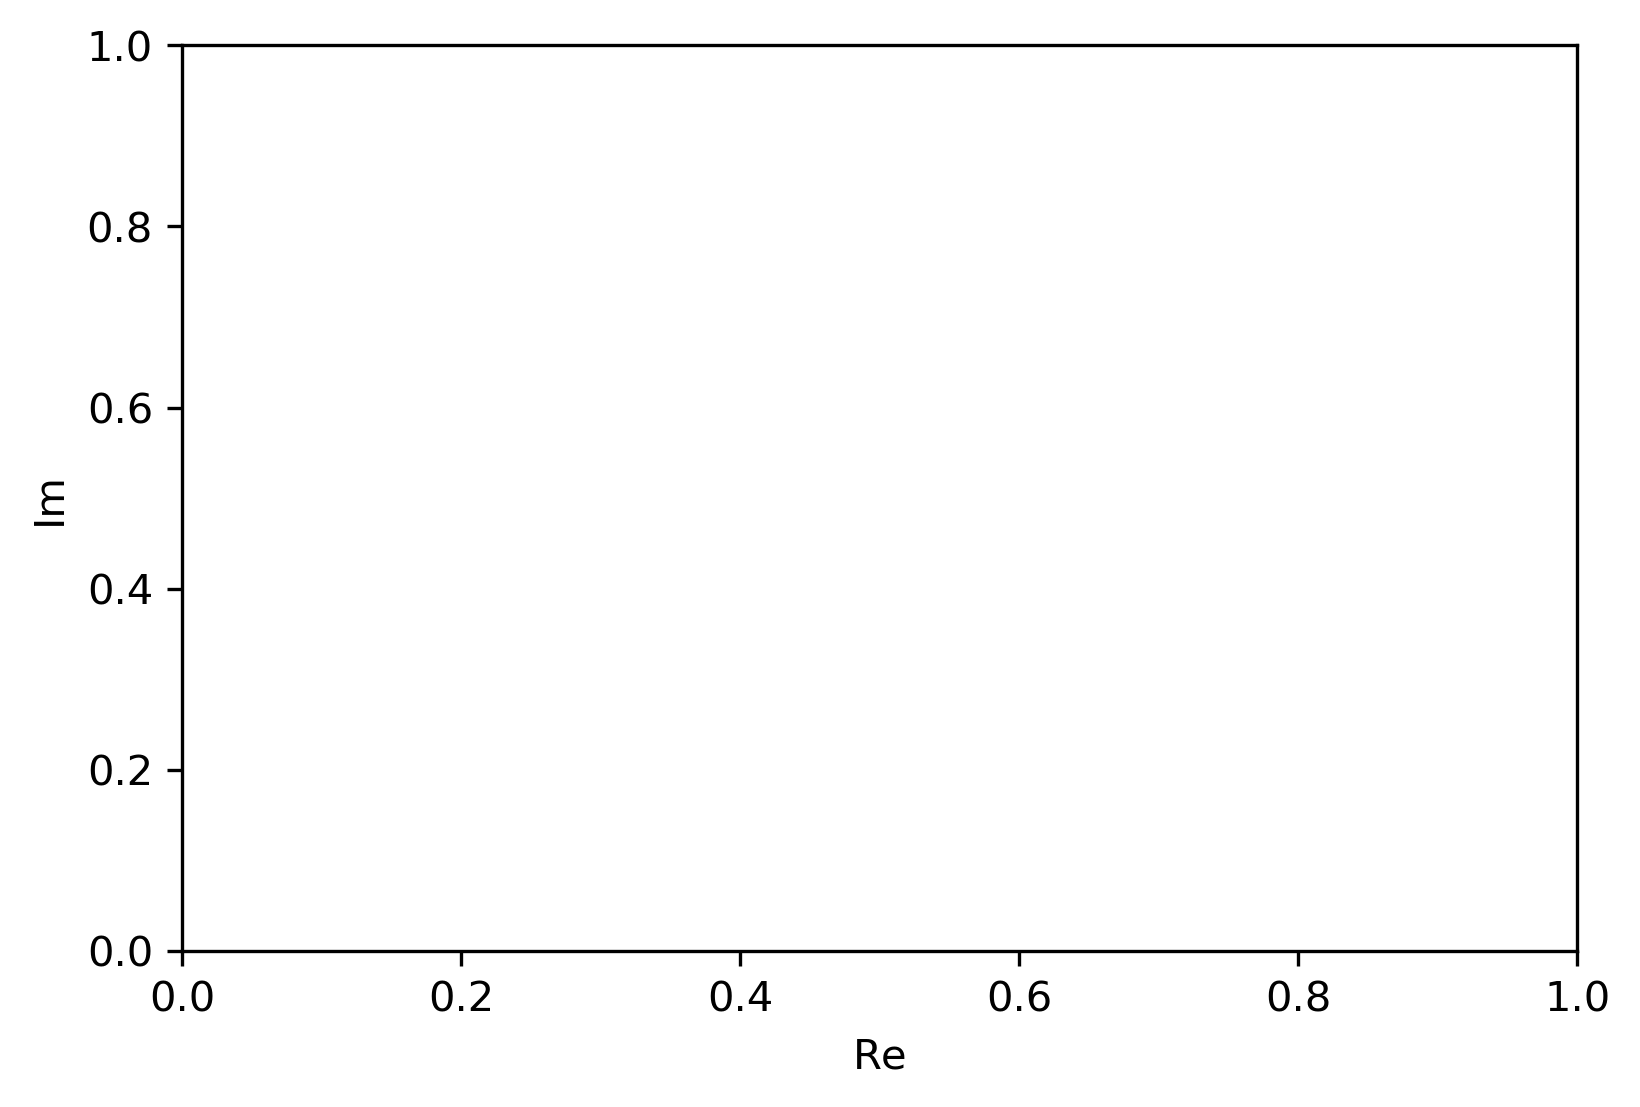

In [45]:
#Aufruf der Funktion listPlot und Übergabe der Liste "listOfZoomSteps"
listPlot(listOfZoomSteps)

###  Erzeugen von insgesamt 6 Zoomlisten mit den verschiedenen vergrößerten Bildausschnitten:

In [ ]:
zoom1 = createZoomListe(-2,1,-1,1,     -0.9, -0.6, 0.1, 0.3,       150)
zoom2 = createZoomListe(-0.9, -0.6, 0.1, 0.3,     -0.75,-0.69,0.225,0.265,       150)
zoom3 = createZoomListe(-0.75,-0.69,0.225,0.265,     -0.726,-0.7185,0.258,0.263,       150)
zoom4 = createZoomListe(-0.726,-0.7185,0.258,0.263,     -0.7255,-0.72325,0.2595,0.261,       150)
zoom5 = createZoomListe(-0.7255,-0.72325,0.2595,0.261,     -0.7245,-0.72405,0.2599,0.2602,       150)
zoom5 = createZoomListe(-0.7255,-0.72325,0.2595,0.261,     -0.7245,-0.72405,0.2599,0.2602,       150)
zoom6 = createZoomListe(-0.7245,-0.72405,0.2599,0.2602,     -0.72446,-0.724325,0.260055,0.260145,       150)

###  Erzeugen von insgesamt 6 Zoomphasen:
Jede Zoomphase besteht aus beliebig vielen Bildern die mit dem letzten Parameter der Funktion createZoomListe() angegeben werden.

In [ ]:
animateApfelmaennchenZoom(zoom1)

In [ ]:
animateApfelmaennchenZoom(zoom2)

In [ ]:
animateApfelmaennchenZoom(zoom3)

In [ ]:
animateApfelmaennchenZoom(zoom4)

In [ ]:
animateApfelmaennchenZoom(zoom5)

In [ ]:
animateApfelmaennchenZoom(zoom6)